In [48]:
import torch
import torch.nn as nn
from torch import optim
from torch.utils.data import Dataset, DataLoader

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

from extract import extract
from crop import crop

import warnings
warnings.filterwarnings("ignore")

In [49]:
# Read in the train and test data.
train_data = pd.read_csv('./data_csv/mnist_train.csv')
test_data = pd.read_csv('./data_csv/mnist_test.csv')

# sheck :
print(train_data.shape[0]+1)
print(test_data.shape[0]+1)

60000
10000


In [50]:
# Seperate the labels from the input data.
train_y = train_data.values[:,0]
train_x = train_data.values[:,1:].astype(np.float32)
test_y = test_data.values[:,0]
test_x = test_data.values[:,1:].astype(np.float32)

In [51]:
# Calculate how much of our training data is for train and validation.
VALIDATION_PERCENT = 0.1  # 0.0 to 1.0
num_train = len(train_y)
num_val = int(num_train*VALIDATION_PERCENT)
print (num_train)
print(num_val)

59999
5999


In [52]:
# Reshape data back to images, transpose to N,C,H,W format for pytorch. 

train_x = train_x.reshape([-1, 28, 28, 1]).transpose((0,3,1,2))
test_x = test_x.reshape([-1, 28, 28, 1]).transpose((0,3,1,2))

0


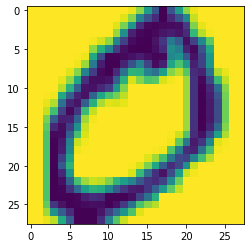

[6.230564629272401e-17, 3.000000000000001, -0.049180327868852736, 3.0819672131147535, -0.5629213483146068, 4.095505617977527, 6.230564629272401e-17, 3.000000000000001, 6.230564629272401e-17, 3.000000000000001, -0.1541769041769042, 2.1910319410319428, -0.5192307692307695, 5.019230769230768, -0.2314305364511688, 4.420907840440164, -0.02972901867929541, 2.6685082872928185, -0.02564102564102512, 4.290598290598288, -0.28643724696356304, 3.2479757085020236, 0.02952700811642875, 3.2759585782255805, -0.2211986940298511, 3.5594682835820906, 5.00284174664193e-16, 2.9999999999999982, -0.06900328587075565, 3.4238773274917844, 6.230564629272401e-17, 3.000000000000001]


In [69]:

# Sanity check to see an example and print its label and ably extraction on it 
example_im = train_x[0,0,:,:]
img = crop(~example_im.astype(np.uint8))

print(train_y[0])

plt.imshow(img)
plt.show()

img = example_im.astype(np.uint8)
print(extract(img))


In [54]:
# creating a new dataset of features
data = pd.DataFrame(columns = list(range(0,32)),index = list(range(0,60000)))


In [55]:
for i in range (0,59999):
    mnist = train_x[i,0,:,:]
    img = crop(~mnist.astype(np.uint8))
    values = extract(img)
    data.loc[i]= values
    

In [56]:
data.drop(data.tail(2).index,inplace=True)

In [57]:
data.to_csv('./data_csv/train-extracted.csv')


In [58]:
print(len(train_y))
data.tail(3)

59999


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
59995,0,0,0,0,-0.342105,3.973684,-0.814286,4.771429,0,0,...,0,0,-1.6,9.0,-3.5,17.5,1.230769,-3.615385,0,0
59996,0,0,-1.0,9.0,0.333333,1.0,-0.5,3.5,0,0,...,0,0,0.458333,2.75,-1.666667,12.833333,-0.0,3.0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0.166667,0.5,-0.5,7.0,0,0,0,0,0,0


In [59]:
print(train_y)

[0 4 1 ... 5 6 8]


In [60]:
# creating a data set for lables :

lables = pd.DataFrame(train_y,columns =['lables'])

In [70]:
lables.head(3)

,lables
0,0
1,4
2,1


In [62]:
lables.to_csv('./data_csv/train-lables.csv')

In [63]:
# turn test data to csv too :

test_data = pd.DataFrame(columns = list(range(0,32)),index = list(range(0,10000)))
test_lables = pd.DataFrame(train_y,columns =['lables'])


for i in range (0,9999):
    mnist = test_x[i,0,:,:]
    img = crop(~mnist.astype(np.uint8))
    values = extract(img)
    test_data.loc[i]= values
   

In [64]:
test_lables = pd.DataFrame(test_y,columns =['lables'])

In [65]:
test_data.drop(test_data.tail(2).index,inplace=True)

In [66]:

test_data.to_csv('./data_csv/test-extracted.csv')
test_lables.to_csv('./data_csv/test-lables.csv')

In [67]:
test_data.tail(3)


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
9995,-0.0,5.75,-0.077064,3.52844,-0.566667,3.733333,0,0,0,0,...,-0.133803,0.838028,-0.5,6.5,-0.920455,7.193182,0.729242,0.965704,0.0,0.0
9996,0,0,0.464286,-0.071429,0.315789,3.578947,0,0,-0.0,6.0,...,0,0,0,0,0.067039,2.586592,0,0,0,0
9997,0,0,-3.285714,21.428571,0.25,1.5,0.25,1.25,-0.065789,5.855263,...,0,0,-2.0,5.0,0.166667,1.333333,0,0,0,0


In [68]:
test_lables.head(3)

,lables
0,2
1,1
2,0
